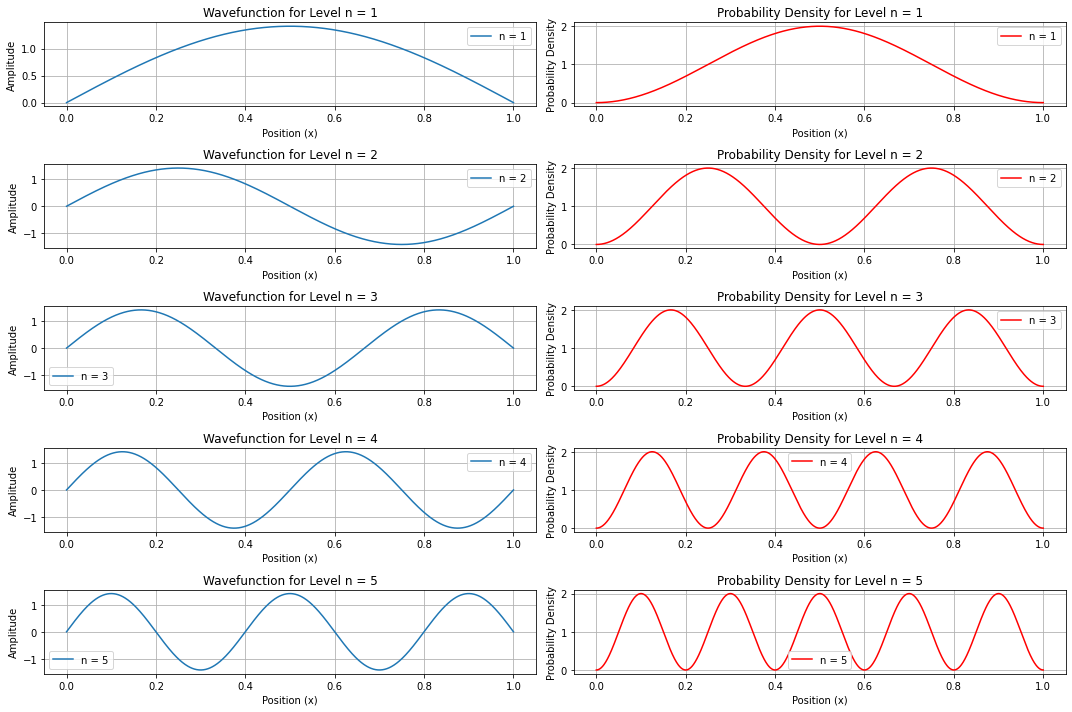

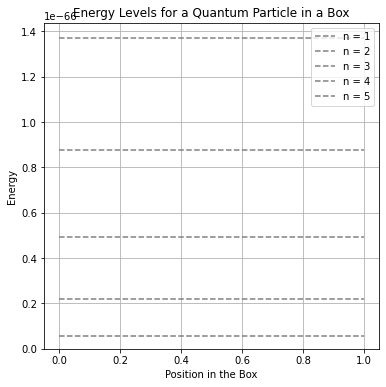

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar

# Constants
m = 1
l = 1      # Length of the box
n_levels = 5 # Number of energy levels to display
x = np.linspace(0, l, 1000) # x-values within the box

# Function to calculate the wavefunction
def wavefunction(n, x):
    return np.sqrt(2 / l) * np.sin(n * np.pi * x / l)

# Function to calculate the energy levels
def energy_level(n):
    return n**2 * np.pi**2 * hbar**2 / (2 * m * l**2)

# Plotting the wavefunctions and probability densities
plt.figure(figsize=(15, 10))

for n in range(1, n_levels + 1):
    psi_n = wavefunction(n, x)
    probability_density = np.abs(psi_n)**2
    
    plt.subplot(n_levels, 2, 2 * n - 1)
    plt.plot(x, psi_n, label=f"n = {n}")
    plt.title(f"Wavefunction for Level n = {n}")
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    
    plt.subplot(n_levels, 2, 2 * n)
    plt.plot(x, probability_density, label=f"n = {n}", color="red")
    plt.title(f"Probability Density for Level n = {n}")
    plt.xlabel("Position (x)")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the energy levels
plt.figure(figsize=(6, 6))

for n in range(1, n_levels + 1):
    energy = energy_level(n)
    
    # Plot the energy level as a horizontal line
    plt.hlines(energy, 0, l, color="grey", linestyle="--", label=f"n = {n}")

plt.title("Energy Levels for a Quantum Particle in a Box")
plt.xlabel("Position in the Box")
plt.ylabel("Energy")
plt.ylim(0)
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar
import ipywidgets as widgets
from IPython.display import display

# Constants
l = 1      # Length of the box
x = np.linspace(0, l, 1000) # x-values within the box
m = 1        # Mass of the particle
max_n = 10    # Maximum value for n

# Function to calculate the wavefunction
def wavefunction(n, x):
    return np.sqrt(2 / l) * np.sin(n * np.pi * x / l)

# Function to calculate the energy levels
def energy_level(n):
    return n**2 * np.pi**2 * hbar**2 / (2 * m * l**2)

# Function to update the plots based on the value of n
def update_plot(n):
    psi_n = wavefunction(n, x)
    probability_density = np.abs(psi_n)**2
    
    plt.figure(figsize=(15, 10))
    
    # Plot wavefunction
    plt.subplot(3, 1, 1)
    plt.plot(x, psi_n)
    plt.title(f"Wavefunction for Level n = {n}")
    plt.xlabel("Position (x)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    
    # Plot probability density
    plt.subplot(3, 1, 2)
    plt.plot(x, probability_density, color="red")
    plt.title(f"Probability Density for Level n = {n}")
    plt.xlabel("Position (x)")
    plt.ylabel("Probability Density")
    plt.grid(True)

    # Plot all energy levels
    plt.subplot(3, 1, 3)
    for level in range(1, max_n + 1):
        energy = energy_level(level)
        color = "green" if level == n else "grey"
        linestyle = "--" if level != n else "-"
        plt.hlines(energy, 0, l, color=color, linestyle=linestyle)

    plt.title("Energy Levels for a Quantum Particle in a Box")
    plt.xlabel("Position in the Box")
    plt.ylabel("Energy")
    plt.ylim(0)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Create a slider for n
n_slider = widgets.IntSlider(value=1, min=1, max=max_n, step=1, description='n:')
widgets.interactive(update_plot, n=n_slider)


interactive(children=(IntSlider(value=1, description='n:', max=10, min=1), Output()), _dom_classes=('widget-in…